# Index exploration

This notebook explores the indicies computed from sound files in a <a href="https://github.com/ljvillanueva/pumilio">pumilio</a> database.

#### Required packages

<a href="https://github.com/pydata/pandas">pandas</a> <br />
<a href="https://github.com/numpy/numpy">numpy</a> <br />
<a href="https://github.com/matplotlib/matplotlib">matplotlib</a> <br />
<a href="https://github.com/jacobdein/pymilio">pymilio</a>

#### Import statements

In [1]:
import pandas
from Pymilio import database
import numpy as np

In [2]:
import matplotlib.pylab as plt

In [3]:
%matplotlib inline

#### Connect to database

In [4]:
db = database.Pymilio_db_connection(user='pumilio',
                                    database='pumilio',
                                    read_default_file='~/.my.cnf.pumilio')

In [5]:
Sounds = db.fetch_as_pandas_df(table='Sounds', fields=['SoundID', 'SiteID', 'ColID']).set_index('SoundID')
Sites = db.fetch_as_pandas_df(table='Sites', fields=['SiteID', 'ID', 'SiteName']).set_index('SiteID')

## NDSI

In [6]:
IndexNDSI = db.fetch_as_pandas_df(table='IndexNDSI', fields=['Sound', 'ndsi_left', 'ndsi_right', 'biophony_left', 'biophony_right', 'anthrophony_left', 'anthrophony_right']).set_index('Sound')

In [7]:
ndsi = IndexNDSI.join(Sounds).join(Sites, on='SiteID').drop('SiteID', axis=1)

In [8]:
ndsi_collection1 = ndsi.groupby('ColID').get_group(1)

In [9]:
ndsi_collection1_byID = ndsi_collection1.groupby('ID')

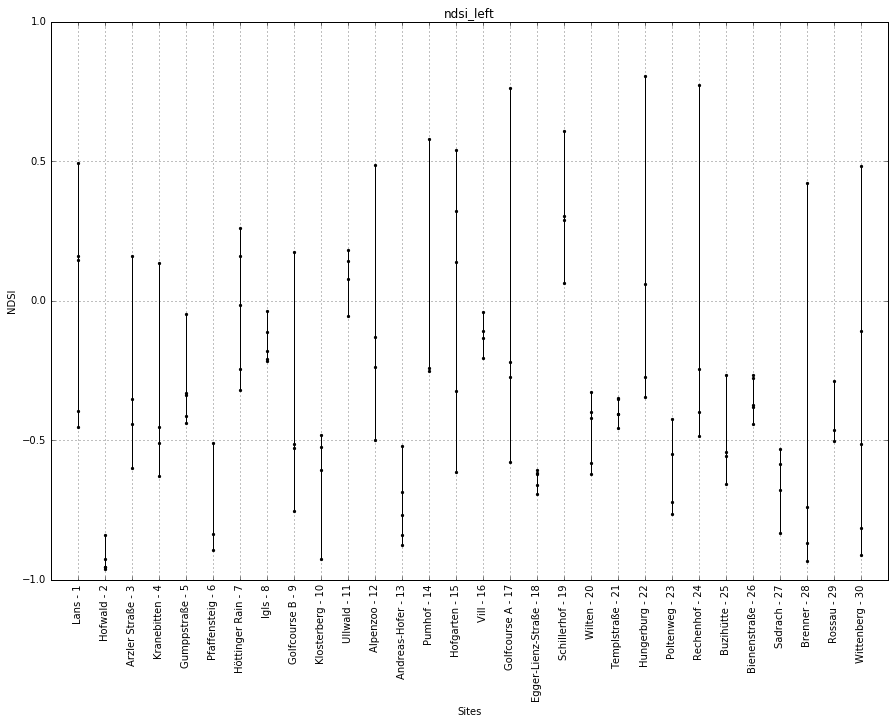

In [10]:
plt.figure(figsize=(15,10))
for name, group in ndsi_collection1_byID:
    plt.plot(group['ID'].as_matrix(), group['ndsi_left'].as_matrix(), 'k-')
    plt.scatter(group['ID'].as_matrix(), group['ndsi_left'].as_matrix(), color='black', marker='.')
plt.xlim(0, 31)
plt.ylim(-1, 1)
plt.xlabel('Sites')
plt.ylabel('NDSI')
plt.title('ndsi_left')
xticks = [i for i in range(1, len(ndsi_collection1_byID)+1)]
xticklabels = Sites.sort_values(by='ID')['SiteName'].iloc[1:31].as_matrix()
xticklabels = ["{0} - {1}".format(xticklabels[i-1], i) for i in xticks]
plt.xticks(xticks, xticklabels, rotation='vertical')
plt.grid()

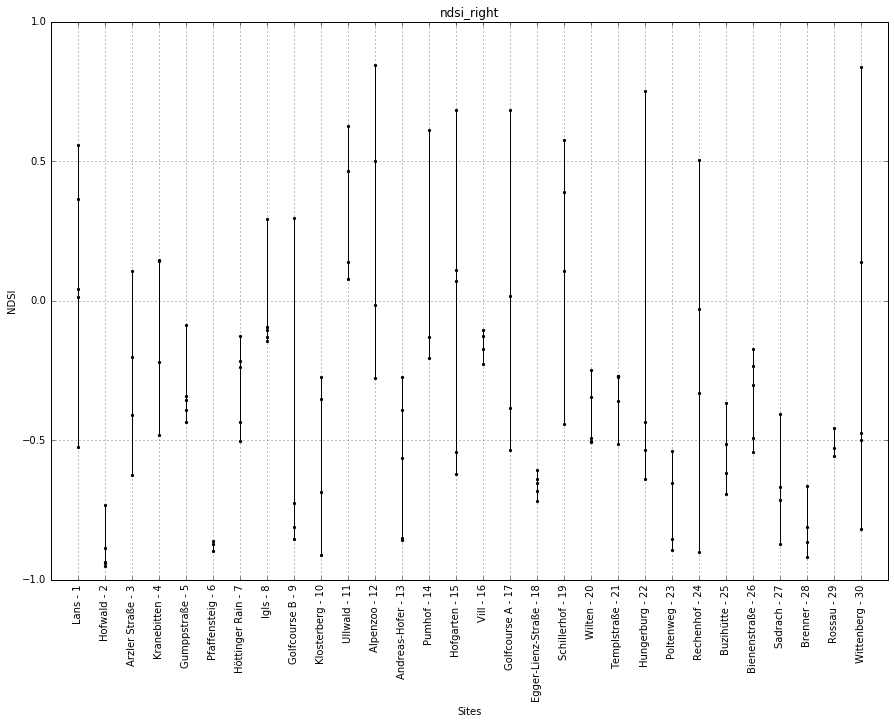

In [11]:
plt.figure(figsize=(15,10))
for name, group in ndsi_collection1_byID:
    plt.plot(group['ID'].as_matrix(), group['ndsi_right'].as_matrix(), 'k-')
    plt.scatter(group['ID'].as_matrix(), group['ndsi_right'].as_matrix(), color='black', marker='.')
plt.xlim(0, 31)
plt.ylim(-1, 1)
plt.xlabel('Sites')
plt.ylabel('NDSI')
plt.title('ndsi_right')
xticks = [i for i in range(1, len(ndsi_collection1_byID)+1)]
xticklabels = Sites.sort_values(by='ID')['SiteName'].iloc[1:31].as_matrix()
xticklabels = ["{0} - {1}".format(xticklabels[i-1], i) for i in xticks]
plt.xticks(xticks, xticklabels, rotation='vertical')
plt.grid()

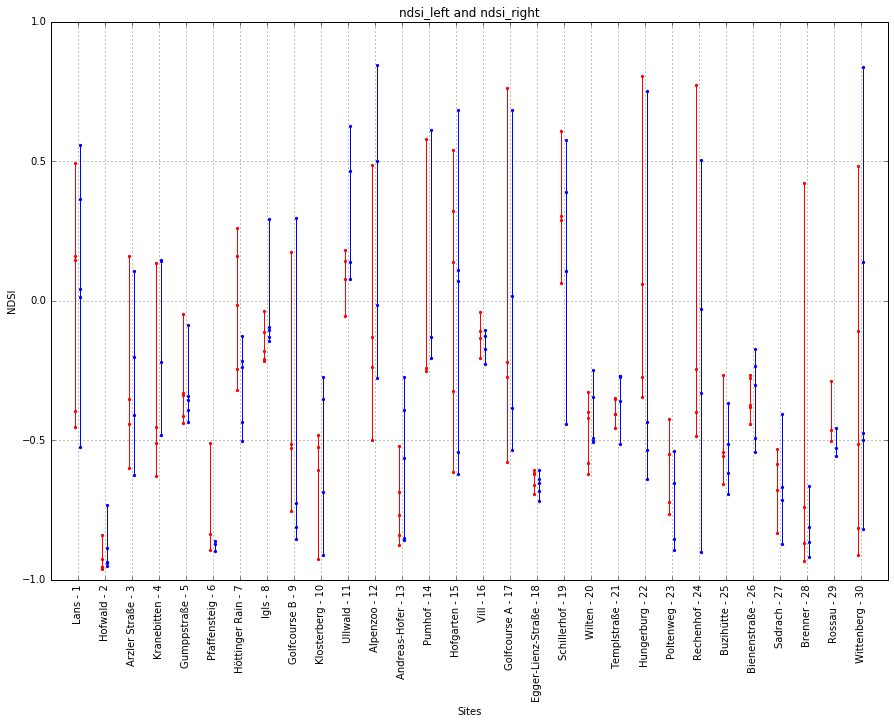

In [12]:
plt.figure(figsize=(15,10))
for name, group in ndsi_collection1_byID:
    x = (group['ID'].as_matrix()) - 0.1
    y = group['ndsi_left'].as_matrix()
    plt.plot(x, y, 'r-')
    plt.scatter(x, y, color='red', marker='.')
    x = (group['ID'].as_matrix()) + 0.1
    y = group['ndsi_right'].as_matrix()
    plt.plot(x, y, 'b-')
    plt.scatter(x, y, color='blue', marker='.')
plt.xlim(0, 31)
plt.ylim(-1, 1)
plt.xlabel('Sites')
plt.ylabel('NDSI')
plt.title('ndsi_left and ndsi_right')
xticks = [i for i in range(1, len(ndsi_collection1_byID)+1)]
xticklabels = Sites.sort_values(by='ID')['SiteName'].iloc[1:31].as_matrix()
xticklabels = ["{0} - {1}".format(xticklabels[i-1], i) for i in xticks]
plt.xticks(xticks, xticklabels, rotation='vertical')
plt.grid()

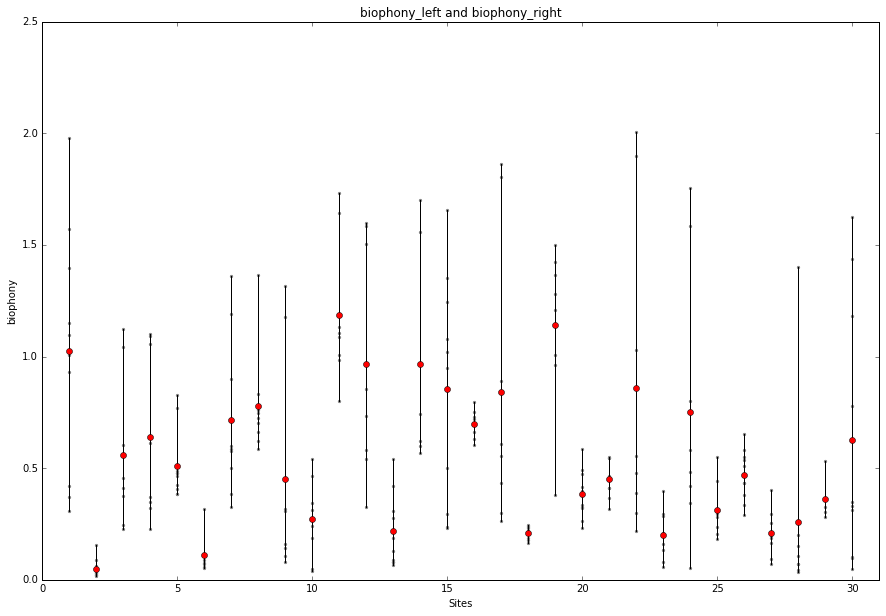

In [13]:
ordered_list = [23, 30, 22,  2, 17, 19, 11,  4,  9, 10, 25, 13, 24, 12, 14, 27,  1,
       28,  6, 18,  8, 15, 20,  7, 26, 16,  5,  3, 21, 29]

plt.figure(figsize=(15,10))
for name, group in ndsi_collection1_byID:
#for n in ordered_list:
 #   group = ndsi_collection1_byID.get_group(n)
    x = (group['ID'].as_matrix())
    y_left = group['biophony_left'].as_matrix()
    #plt.plot(x, y, 'r-')
    #plt.scatter(x, y, color='red', marker='.')
    y_right = group['biophony_right'].as_matrix()
    y = np.append(y_left, y_right)
    x = np.append(x, x)
    plt.plot(x, y, 'k-')
    plt.scatter(x, y, color='gray', marker='.')
    # average
    avg = y.mean()
    plt.plot(x[0], avg, 'ro')
plt.xlim(0, 31)
plt.ylim(0, 2.5)
plt.xlabel('Sites')
plt.ylabel('biophony')
plt.title('biophony_left and biophony_right')
#xticks = [i for i in range(1, len(ndsi_collection1_byID)+1)]
#xticklabels = Sites.sort_values(by='ID')['SiteName'].iloc[1:31].as_matrix()
#xticklabels = ["{0} - {1}".format(xticklabels[i-1], i) for i in xticks]
#plt.xticks(xticks, xticklabels, rotation='vertical')
#plt.grid()
#plt.savefig('/Users/Jake/Desktop/biophony_nosort.png', format='png')

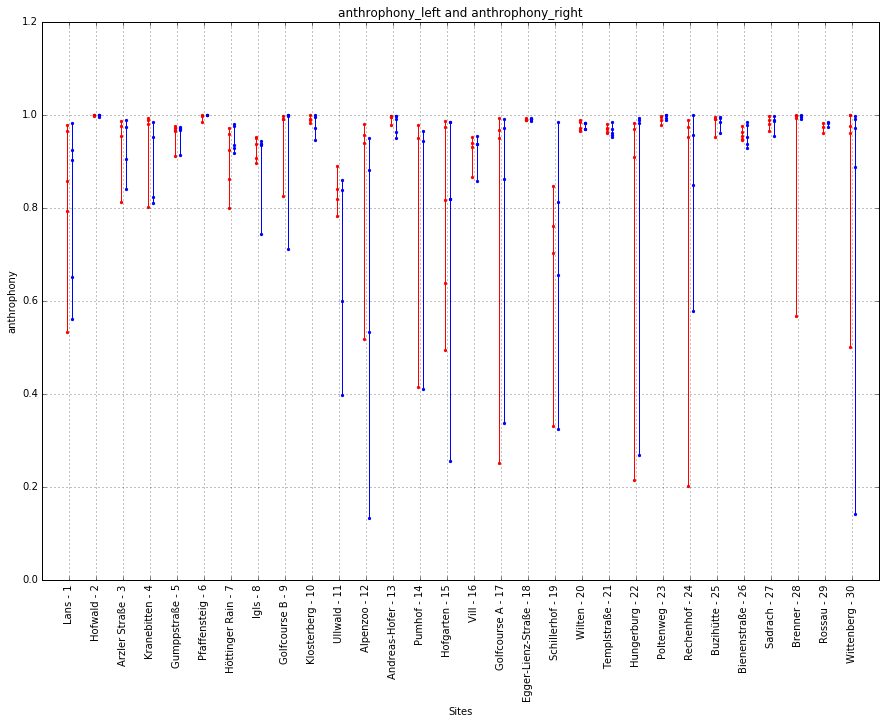

In [14]:
plt.figure(figsize=(15,10))
for name, group in ndsi_collection1_byID:
    x = (group['ID'].as_matrix()) - 0.1
    y = group['anthrophony_left'].as_matrix()
    plt.plot(x, y, 'r-')
    plt.scatter(x, y, color='red', marker='.')
    x = (group['ID'].as_matrix()) + 0.1
    y = group['anthrophony_right'].as_matrix()
    plt.plot(x, y, 'b-')
    plt.scatter(x, y, color='blue', marker='.')
plt.xlim(0, 31)
#plt.ylim(0, 2.5)
plt.xlabel('Sites')
plt.ylabel('anthrophony')
plt.title('anthrophony_left and anthrophony_right')
xticks = [i for i in range(1, len(ndsi_collection1_byID)+1)]
xticklabels = Sites.sort_values(by='ID')['SiteName'].iloc[1:31].as_matrix()
xticklabels = ["{0} - {1}".format(xticklabels[i-1], i) for i in xticks]
plt.xticks(xticks, xticklabels, rotation='vertical')
plt.grid()

## ACI

In [15]:
IndexACI = db.fetch_as_pandas_df(table='IndexACI', fields=['Sound', 'AciTotAll_left_bymin', 'AciTotAll_right_bymin']).set_index('Sound')

In [16]:
aci = IndexACI.join(Sounds).join(Sites, on='SiteID').drop('SiteID', axis=1)

In [17]:
aci_collection1 = aci.groupby('ColID').get_group(1)

In [18]:
aci_collection1_byID = aci_collection1.groupby('ID')

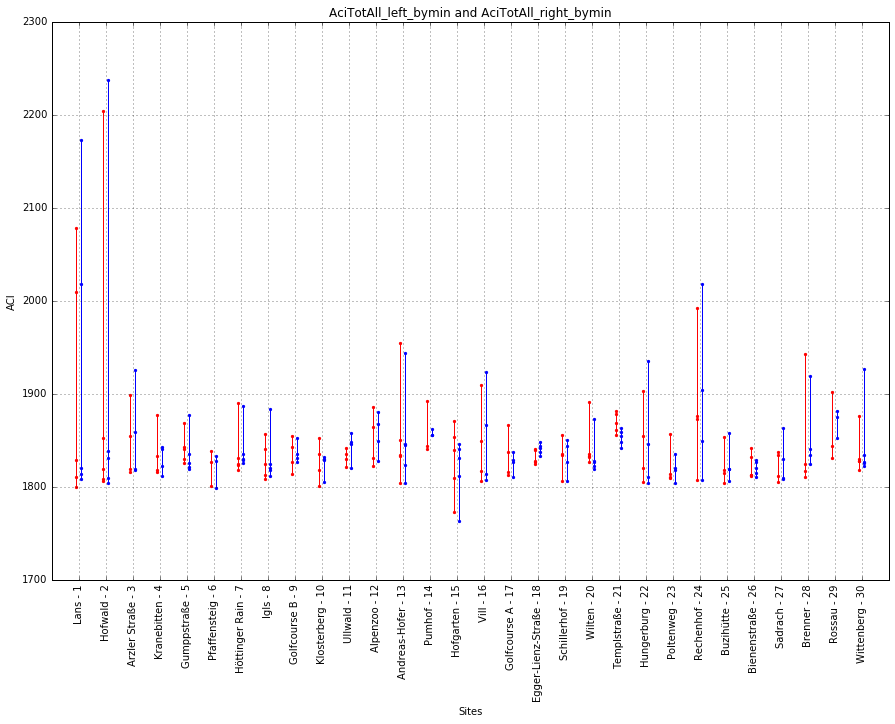

In [19]:
plt.figure(figsize=(15,10))
for name, group in aci_collection1_byID:
    x = (group['ID'].as_matrix()) - 0.1
    y = group['AciTotAll_left_bymin'].as_matrix()
    plt.plot(x, y, 'r-')
    plt.scatter(x, y, color='red', marker='.')
    x = (group['ID'].as_matrix()) + 0.1
    y = group['AciTotAll_right_bymin'].as_matrix()
    plt.plot(x, y, 'b-')
    plt.scatter(x, y, color='blue', marker='.')
plt.xlim(0, 31)
plt.xlabel('Sites')
plt.ylabel('ACI')
plt.title('AciTotAll_left_bymin and AciTotAll_right_bymin')
xticks = [i for i in range(1, len(aci_collection1_byID)+1)]
xticklabels = Sites.sort_values(by='ID')['SiteName'].iloc[1:31].as_matrix()
xticklabels = ["{0} - {1}".format(xticklabels[i-1], i) for i in xticks]
plt.xticks(xticks, xticklabels, rotation='vertical')
plt.grid()

## ADI

In [20]:
IndexADI = db.fetch_as_pandas_df(table='IndexADI', fields=['Sound', 'adi_left', 'adi_right']).set_index('Sound')

In [21]:
adi = IndexADI.join(Sounds).join(Sites, on='SiteID').drop('SiteID', axis=1)

In [22]:
adi_collection1 = adi.groupby('ColID').get_group(1)

In [23]:
adi_collection1_byID = adi_collection1.groupby('ID')

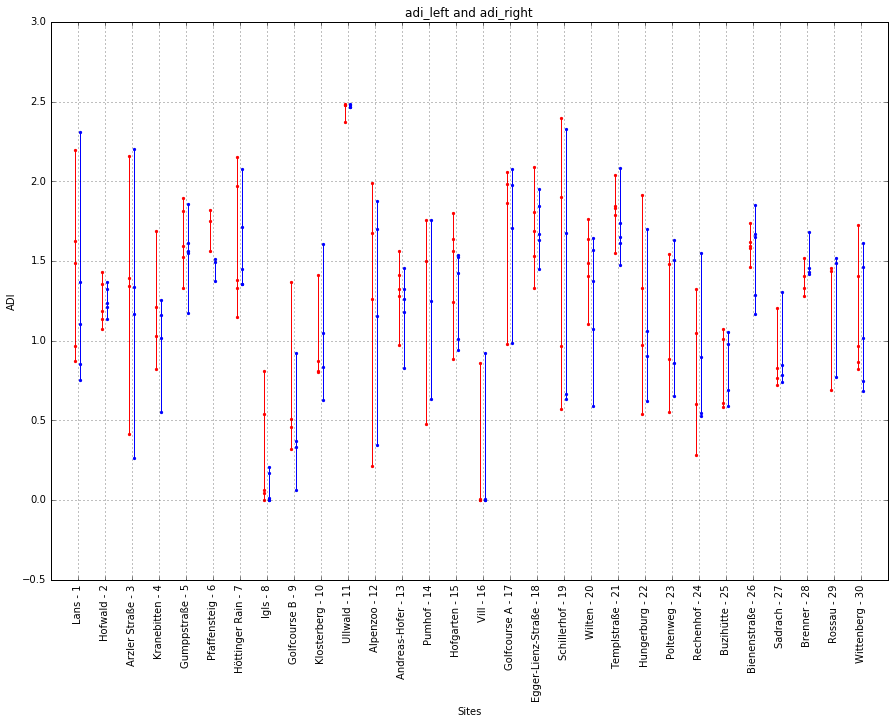

In [24]:
plt.figure(figsize=(15,10))
for name, group in adi_collection1_byID:
    x = (group['ID'].as_matrix()) - 0.1
    y = group['adi_left'].as_matrix()
    plt.plot(x, y, 'r-')
    plt.scatter(x, y, color='red', marker='.')
    x = (group['ID'].as_matrix()) + 0.1
    y = group['adi_right'].as_matrix()
    plt.plot(x, y, 'b-')
    plt.scatter(x, y, color='blue', marker='.')
plt.xlim(0, 31)
#plt.ylim(-1, 1)
plt.xlabel('Sites')
plt.ylabel('ADI')
plt.title('adi_left and adi_right')
xticks = [i for i in range(1, len(adi_collection1_byID)+1)]
xticklabels = Sites.sort_values(by='ID')['SiteName'].iloc[1:31].as_matrix()
xticklabels = ["{0} - {1}".format(xticklabels[i-1], i) for i in xticks]
plt.xticks(xticks, xticklabels, rotation='vertical')
plt.grid()

## AEI

In [25]:
IndexAEI = db.fetch_as_pandas_df(table='IndexAEI', fields=['Sound', 'aei_left', 'aei_right']).set_index('Sound')

In [26]:
aei = IndexAEI.join(Sounds).join(Sites, on='SiteID').drop('SiteID', axis=1)

In [27]:
aei_collection1 = aei.groupby('ColID').get_group(1)

In [28]:
aei_collection1_byID = aei_collection1.groupby('ID')

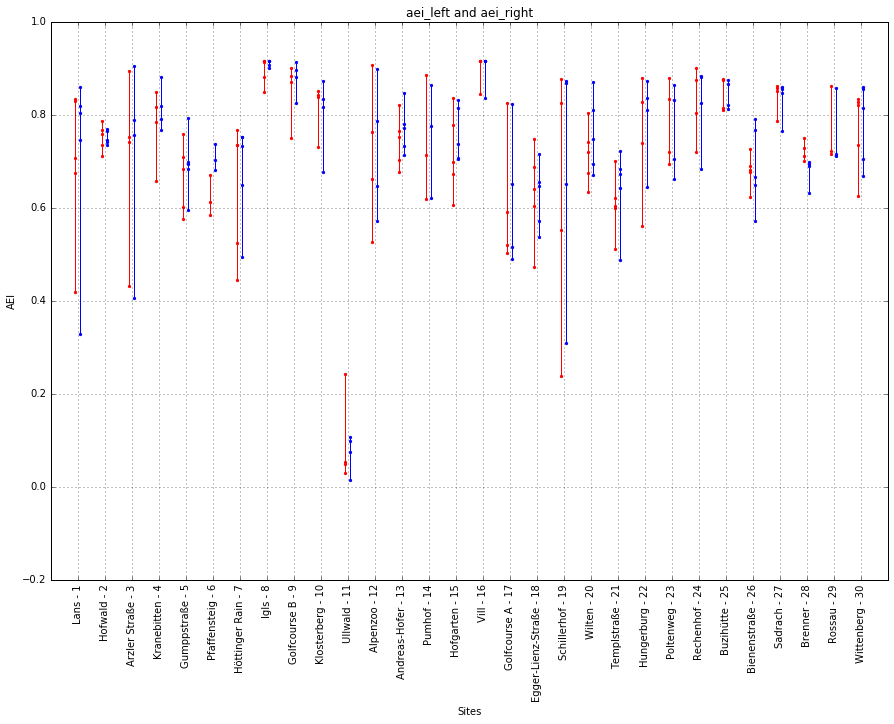

In [29]:
plt.figure(figsize=(15,10))
for name, group in aei_collection1_byID:
    x = (group['ID'].as_matrix()) - 0.1
    y = group['aei_left'].as_matrix()
    plt.plot(x, y, 'r-')
    plt.scatter(x, y, color='red', marker='.')
    x = (group['ID'].as_matrix()) + 0.1
    y = group['aei_right'].as_matrix()
    plt.plot(x, y, 'b-')
    plt.scatter(x, y, color='blue', marker='.')
plt.xlim(0, 31)
#plt.ylim(-1, 1)
plt.xlabel('Sites')
plt.ylabel('AEI')
plt.title('aei_left and aei_right')
xticks = [i for i in range(1, len(aei_collection1_byID)+1)]
xticklabels = Sites.sort_values(by='ID')['SiteName'].iloc[1:31].as_matrix()
xticklabels = ["{0} - {1}".format(xticklabels[i-1], i) for i in xticks]
plt.xticks(xticks, xticklabels, rotation='vertical')
plt.grid()

## BAI

In [30]:
IndexBAI = db.fetch_as_pandas_df(table='IndexBAI', fields=['Sound', 'left_area', 'right_area']).set_index('Sound')

In [31]:
bai = IndexBAI.join(Sounds).join(Sites, on='SiteID').drop('SiteID', axis=1)

In [32]:
bai_collection1 = bai.groupby('ColID').get_group(1)

In [33]:
bai_collection1_byID = bai_collection1.groupby('ID')

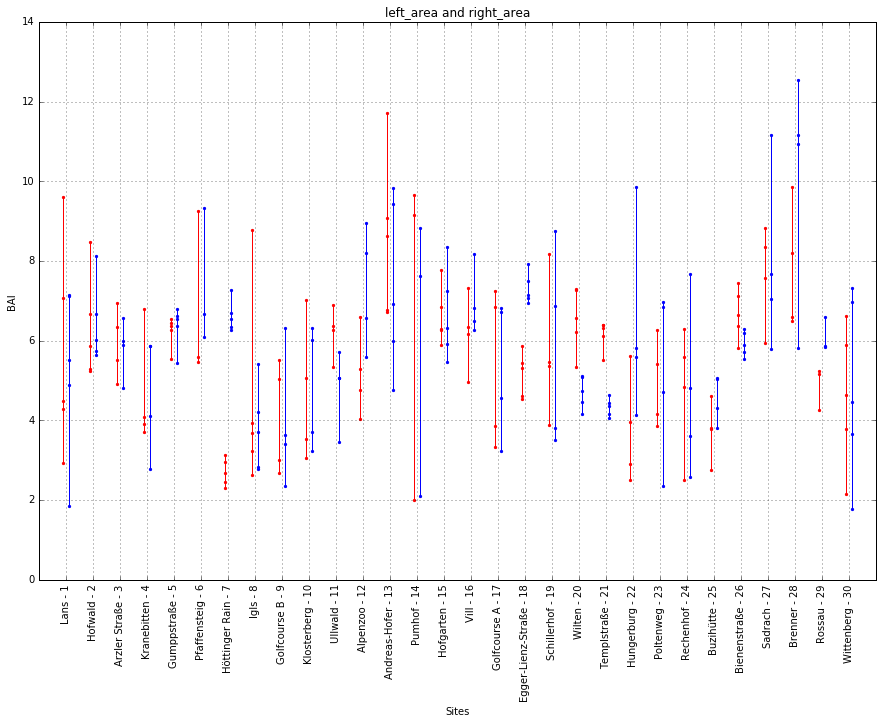

In [34]:
plt.figure(figsize=(15,10))
for name, group in bai_collection1_byID:
    x = (group['ID'].as_matrix()) - 0.1
    y = group['left_area'].as_matrix()
    plt.plot(x, y, 'r-')
    plt.scatter(x, y, color='red', marker='.')
    x = (group['ID'].as_matrix()) + 0.1
    y = group['right_area'].as_matrix()
    plt.plot(x, y, 'b-')
    plt.scatter(x, y, color='blue', marker='.')
plt.xlim(0, 31)
#plt.ylim(-1, 1)
plt.xlabel('Sites')
plt.ylabel('BAI')
plt.title('left_area and right_area')
xticks = [i for i in range(1, len(bai_collection1_byID)+1)]
xticklabels = Sites.sort_values(by='ID')['SiteName'].iloc[1:31].as_matrix()
xticklabels = ["{0} - {1}".format(xticklabels[i-1], i) for i in xticks]
plt.xticks(xticks, xticklabels, rotation='vertical')
plt.grid()

## SSS (soundscapespec)

In [35]:
IndexSSS = db.fetch_as_pandas_df(table='IndexSSS', fields=['Sound', 'frequency_power']).set_index('Sound')

In [36]:
sss = IndexSSS.join(Sounds).join(Sites, on='SiteID').drop('SiteID', axis=1)

In [37]:
sss_collection1 = sss.groupby('ColID').get_group(1)

In [38]:
sss_collection1_byID = sss_collection1.groupby('ID')

In [39]:
sss_group1 = sss_collection1_byID.get_group(1)
sss_group2 = sss_collection1_byID.get_group(2)

In [40]:
sss_group1

,frequency_power,ColID,ID,SiteName
Sound,,,,
240,"['0.8480', '0.3995', '0.2325', '0.2147', '0.07...",1,1,Lans
228,"['0.4679', '0.6354', '0.3941', '0.4662', '0.05...",1,1,Lans
159,"['0.9749', '0.2113', '0.0609', '0.0231', '0.01...",1,1,Lans
127,"['0.7895', '0.1429', '0.1070', '0.5727', '0.07...",1,1,Lans
200,"['0.9602', '0.2580', '0.0928', '0.0485', '0.02...",1,1,Lans


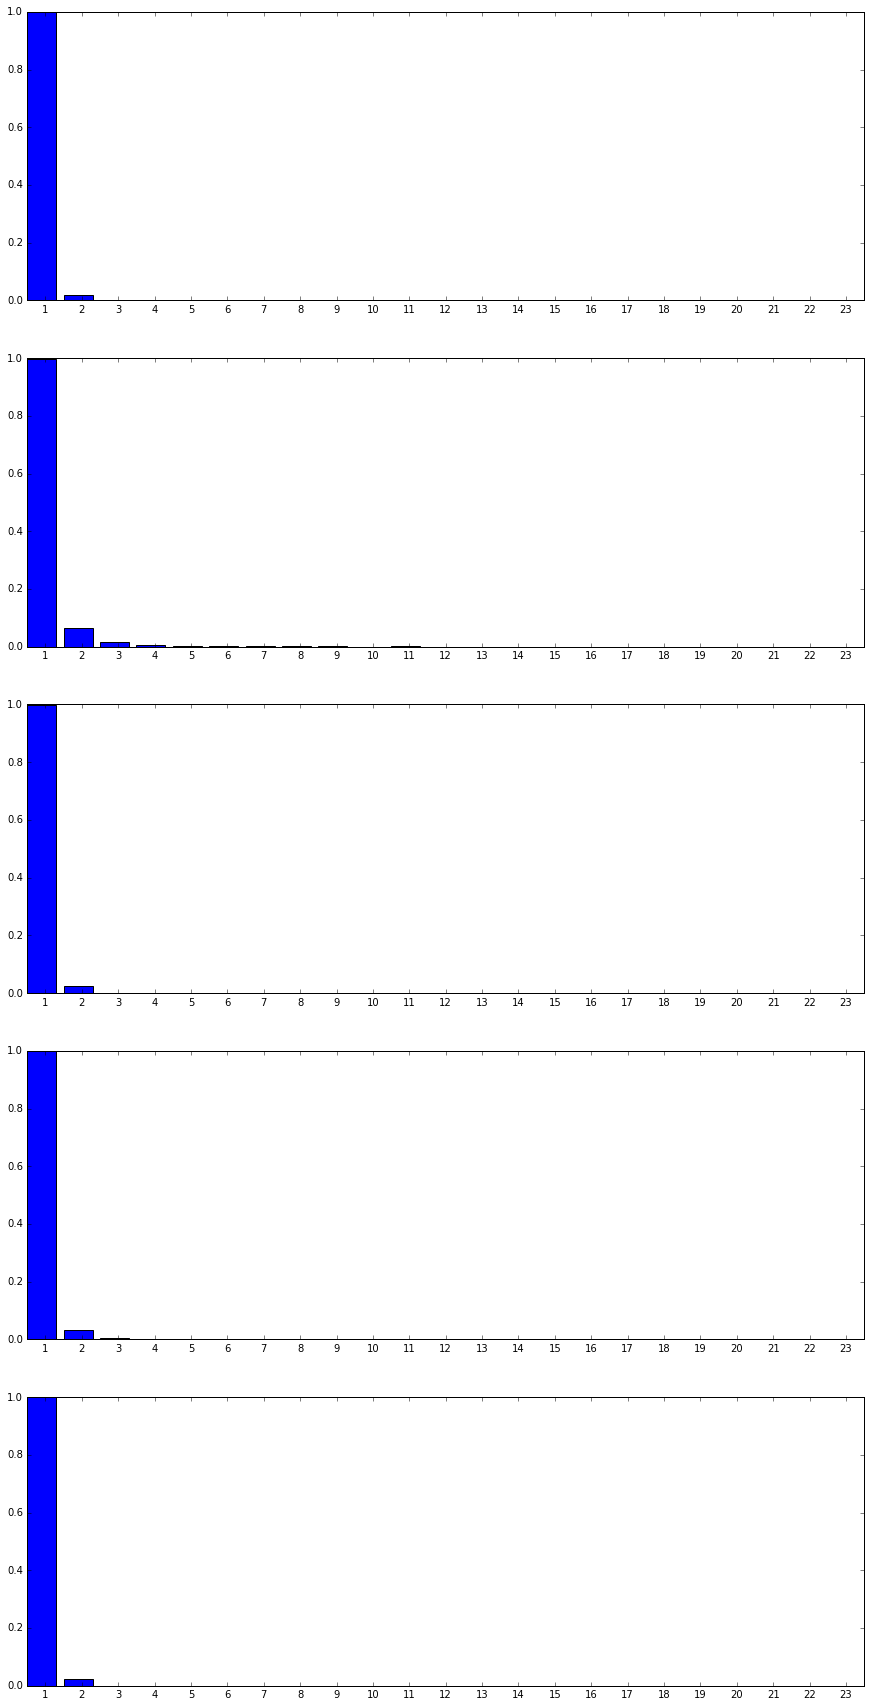

In [41]:
plt.figure(figsize=(15,30))
count = 1
for row in sss_group2.iterrows():
    plt.subplot(len(sss_group1), 1, count)
    heights = [ float(n) for n in eval(row[1]['frequency_power']) ]
    lefts = [ n for n in range(1, len(heights)+1) ]
    plt.bar(lefts, heights)
    plt.xlim(1, 24)
    plt.ylim(0, 1)
    plt.xticks( np.array(lefts)+0.5, [ str(n) for n in lefts ])
    count = count + 1